In [1]:
'''ST10134058 Shivam Mayur Pillay Part 2 PDAN8411 POE'''
print()

In [2]:
# What is classifiction in ML

'''
According to Simplilearn (2022), classification in machine learning attempts to categorize a dependent variable into the correct category 
based on the independent variables provided. Using pre-existing data, one would split the observations into training and testing data to 
recognize and understand the different categories and then test how well the model fits what is trying to be measured. This is done so 
that when the algorithm is face with a similar set of independent variables it will be able to classify it into the correct categories. 
Some examples of this would be the spam filter in emails, the ability for a banking system to determine if a transaction is fraudulent 
or not, determining the object seen in an image and the algorithm’s ability to identify different species. Simplilearn (2022) describes 
classification algorithms as a type of pattern recognition, essentially the algorithm is looking for attributes of the occurrence which 
match a classification.    

'''
print()

In [3]:
# Reference the data set, explain why it is appropriate and how I will asses the data
'''
The data set selected is from Parmar (2018) titled Wine Quality. Here there are different observations of wine which were rated on a scale from 0 to 10. 
Based on the observations in the data set I will attempt to classify whether the wine is of a high or low quality. From the different independent 
variables such as the residual sugar, density and amount of alcohol (to name a few) a machine learning will be created to determine the 
quality of wine. Different independent variable parings will help determine the quality of wine, this can be directly correlated to what 
Simplilearn (2022) said about classification resembling pattern recognition.

As you will be able to see below there are very few values on the extreme end of the scale hence, I will try to accommodate for this when splitting 
the data, this will be done with the stratification function to ensure that the training and testing data is split proportionately. I will also 
only split the data into two different categories (high and low) to reduce the impact of the missing observations on the extreme ends of the scales. 
Usually, I would have to add more observations in to overcome this but at this stage this is not possible.

Since all of the independent variables are in different unit measures the algorithm will not perform as well as it would if the variables are 
in the same unit of measure. To accommodate for this, I will implement a scaler to try and smooth out the data.

I will also consider the different splits that could be used to train and test the data on hand to improve the training and testing scores of 
the Naïve Bayes Classifier and the K-NN Algorithm. Since there are little observations of the extreme variables, in addition to using the stratification 
function in the splitting stage I will also try to implement a Cross-Validation function to improve the score.

A Confusion_matrix will also be shown to ensure that each class is correctly classified and not just one class being classified really well while
the other class is being poorly predicted.
'''
print()

In [6]:
'''
Import A few essential libraries that I will most likely use
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Refsnes Data 2022)

'\nmake note to explain why we use GausianNB ant not the other 2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n'

In [7]:
'''
Below is to stop warnings from being printed
'''

import warnings
warnings.filterwarnings("ignore")

#(Boar 2020)

''

In [8]:
'''
Using a fucntion in Pandas we read a CSV file and organise the data

Please download the CSV file from the link below and save the file in the same folder where POE Part 2 is saved

Download Link: https://www.kaggle.com/datasets/rajyellow46/wine-quality/download

'''

df=pd.read_csv('winequalityN.csv')

# (Refsnes Data, 2022)

In [9]:
''' 
Show the variables in dataset with the 1st 5 observations
'''

df.head(5)

# (The Pandas Development Team, 2022)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
'''
Show the number of observations and variables

From the information below we can see that there are 500 observations and 9 different varibales in the data set
'''

df.shape

# (The Pandas Development Team, 2022)

(6497, 13)

In [11]:
'''
List the columns
'''

df.columns

# (The Pandas Development Team, 2022)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [12]:
'''
Print out a summary of the variable types
'''

df.info()

# (The Pandas Development Team, 2022)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
'''
The dependent variable we will look at is the quality of the wine, we will consider this value as y

The quality of the wine was rated on a scale from (0 to 10) however the min and max values seen are 3 and 9

We need to see the distribution of the quality ratings by doing a count in each quality category
'''

df['quality'].value_counts(sort=False)[[3,4,5,6,7,8,9]]

# (The Pandas Development Team 2022)

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [14]:
'''
Quality will be set as the dependent variable (y) 

I will adjust the dependent to read all quality ratings in the following way:

qaulity between 0 and 5 as low --- Showing that this is a low qaulity wine

quality between 6 and 10 as high --- Showing that this is a high qaulity wine
'''

df['quality'] = df.quality.apply(lambda q: 'low' if q <= 5 else  'high')

# (Burgaud, 2022)
# (DataCamp Team, 2020)

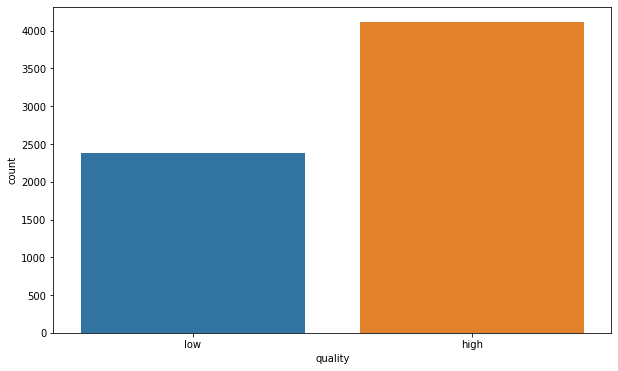

In [15]:

'''
Show the number of observations which fall in the 2 new categories

We can see that there are less lower quality wines after this change, we will have to accomodate for this.
'''

fig = plt.figure(figsize = (10,6))
plotcountlmh=sns.countplot('quality', data=df, order=['low','high'])

# (Marsja, 2020)

In [16]:
'''
Check for feilds with no values

Output below shows no missing feilds
'''

print(df.isna().sum()) 

# (Shin, 2020)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [17]:
'''
show the number of obsertvations after the drop (if we drop all observations with at least 1 missing value)
'''

df.dropna().shape

# (The Pandas Development Team 2022)

(6463, 13)

In [18]:
'''
Find the number of observations lost at each category level when dropping observations with at least one missing value
'''

df2 = df.copy()
df2.dropna(inplace=True)
dfcount=df['quality'].value_counts()
dfcount2=df2['quality'].value_counts()
totalPchange=len(df2.index)/(len(df.index))-1

print('Total percentage of observations lost')
print('{0:.4f}'.format(totalPchange))
print()
print('Count before dropping missing')
print(dfcount)
print()
print('Count after dropping missing')
print(dfcount2)
print()
print('Percentage of lost values change')
print((dfcount2/dfcount)-1)

# (The Pandas Development Team 2022)

Total percentage of observations lost
-0.0052

Count before dropping missing
high    4113
low     2384
Name: quality, dtype: int64

Count after dropping missing
high    4091
low     2372
Name: quality, dtype: int64

Percentage of lost values change
high   -0.005349
low    -0.005034
Name: quality, dtype: float64


In [19]:
''' 
As per above there is only half a percent of the observations in each category level

Therefore drop the rows with missing values
'''

df.dropna(inplace=True)

# (The Pandas Development Team 2022)

In [20]:
'''
Check that there are no missing values after the drop
'''

print(df.isna().sum())

# (The Pandas Development Team 2022)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [21]:
'''
Set quality to = y (as this is the dependent) and set the rest of the variables to x (the independent)
'''

y=df['quality']
x=df[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# (Refsnes Data 2022)

In [22]:
'''
Show a statistical summary of the variables in x
'''

x.describe()

# (Refsnes Data 2022)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [23]:
'''
Show the correlation between each varible in the data set
'''

x.corr().apply(lambda s: s.apply('{0:.4f}'.format))

# (The Pandas Development Team, 2022)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0000,0.2211,0.3237,-0.1134,0.2991,-0.2835,-0.3305,0.4597,-0.2511,0.3013,-0.0962
volatile acidity,0.2211,1.0000,-0.3775,-0.1967,0.3780,-0.3534,-0.4147,0.2721,0.2601,0.2257,-0.0395
citric acid,0.3237,-0.3775,1.0000,0.1423,0.0394,0.1323,0.1944,0.0971,-0.3279,0.0591,-0.0101
residual sugar,-0.1134,-0.1967,0.1423,1.0000,-0.1288,0.4034,0.4957,0.5515,-0.2665,-0.1856,-0.3591
chlorides,0.2991,0.3780,0.0394,-0.1288,1.0000,-0.1954,-0.2796,0.3631,0.0447,0.3962,-0.2577
free sulfur dioxide,-0.2835,-0.3534,0.1323,0.4034,-0.1954,1.0000,0.7215,0.0251,-0.1452,-0.1889,-0.1795
total sulfur dioxide,-0.3305,-0.4147,0.1944,0.4957,-0.2796,0.7215,1.0000,0.0314,-0.2372,-0.2759,-0.2644
density,0.4597,0.2721,0.0971,0.5515,0.3631,0.0251,0.0314,1.0000,0.0125,0.2600,-0.6874
pH,-0.2511,0.2601,-0.3279,-0.2665,0.0447,-0.1452,-0.2372,0.0125,1.0000,0.1909,0.1205
sulphates,0.3013,0.2257,0.0591,-0.1856,0.3962,-0.1889,-0.2759,0.2600,0.1909,1.0000,-0.0041


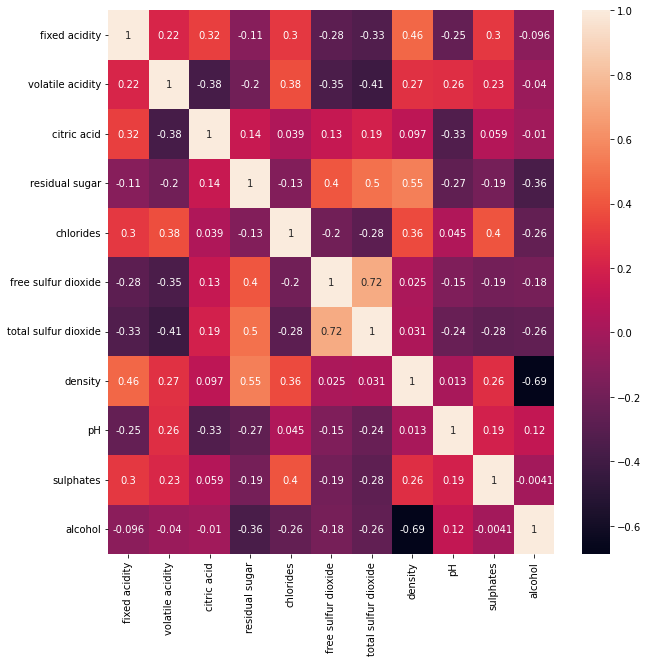

In [24]:
'''
Plot the data onto heatmap
'''

plt.figure(figsize=(10,10))
sns.heatmap(x.corr(), annot=True)
plt.show()

# (Data To Fish, 2020)

In [25]:
'''
Split into Training and Testing sets

Variouse test/training splits of data

Due to the data charateristics random state 0 will be set

Due to there being more high quilty occurances I will set stratify to yes

'''
from sklearn.model_selection import train_test_split

x03_train, x03_test, y03_train, y03_test = train_test_split(x, y, test_size= 0.03, random_state=0,stratify=y)
x06_train, x06_test, y06_train, y06_test = train_test_split(x,  y, test_size= 0.06, random_state=0,stratify=y)
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size= 0.1, random_state=0,stratify=y)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size= 0.2, random_state=0,stratify=y)
x3_train, x3_test, y3_train, y3_test = train_test_split(x,  y, test_size= 0.3, random_state=0,stratify=y)
x4_train, x4_test, y4_train, y4_test = train_test_split(x, y, test_size= 0.4, random_state=0,stratify=y)

# (Scikit-learn developers 2022)

"\nmake sure to explain why we set stratify to 'y'\n\n"

Naive Bayes score @ 3% test split:  0.6649484536082474
Naive Bayes score @ 97% train split:  0.6889456053597065


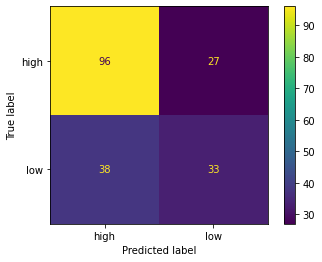

Naive Bayes score @ 6% test split:  0.6907216494845361
Naive Bayes score @ 94% train split:  0.6880658436213992


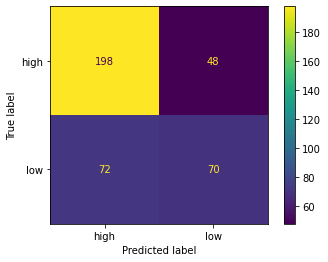

Naive Bayes score @ 10% test split:  0.7078825347758887
Naive Bayes score @ 90% train split:  0.6860385144429161


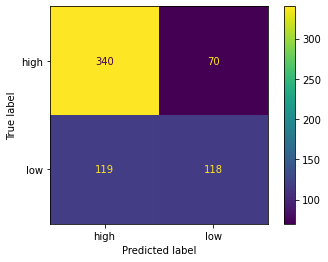

Naive Bayes score @ 20% test split:  0.6883217324052591
Naive Bayes score @ 80% train split:  0.6882011605415861


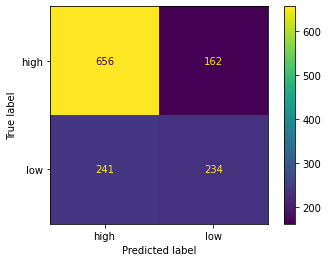

Naive Bayes score @ 30% test split:  0.6859205776173285
Naive Bayes score @ 70% train split:  0.6892130857648099


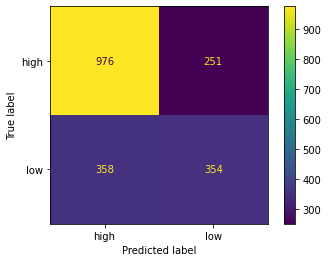

Naive Bayes score @ 40% test split:  0.6817478731631864
Naive Bayes score @ 60% train split:  0.6925457828217694


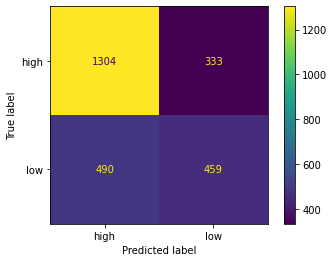

In [26]:
'''
Using Gaussian Naive Bayes on the data set to predict the classifications

Bayses rule is a conditional probablity theorem which mesures probablity of an outcome based on another outcome occuring.

Gaussian Naive Bayes is mainly used for continuous numerical values

Find GNB score
'''
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

gnb=GaussianNB()

gnb.fit(x03_train, y03_train)
gnb.fit(x06_train, y06_train)
gnb.fit(x1_train, y1_train)
gnb.fit(x2_train, y2_train)
gnb.fit(x3_train, y3_train)
gnb.fit(x4_train, y4_train)

print("Naive Bayes score @ 3% test split: ",gnb.score(x03_test, y03_test))
print("Naive Bayes score @ 97% train split: ",gnb.score(x03_train, y03_train))
predictions = gnb.predict(x03_test)
cm = confusion_matrix(y03_test, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 6% test split: ",gnb.score(x06_test, y06_test))
print("Naive Bayes score @ 94% train split: ",gnb.score(x06_train, y06_train))
predictions = gnb.predict(x06_test)
cm = confusion_matrix(y06_test, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 10% test split: ",gnb.score(x1_test, y1_test))
print("Naive Bayes score @ 90% train split: ",gnb.score(x1_train, y1_train))
predictions = gnb.predict(x1_test)
cm = confusion_matrix(y1_test, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 20% test split: ",gnb.score(x2_test, y2_test))
print("Naive Bayes score @ 80% train split: ",gnb.score(x2_train, y2_train))
predictions = gnb.predict(x2_test)
cm = confusion_matrix(y2_test, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 30% test split: ",gnb.score(x3_test, y3_test))
print("Naive Bayes score @ 70% train split: ",gnb.score(x3_train, y3_train))
predictions = gnb.predict(x3_test)
cm = confusion_matrix(y3_test, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 40% test split: ",gnb.score(x4_test, y4_test))
print("Naive Bayes score @ 60% train split: ",gnb.score(x4_train, y4_train))
predictions = gnb.predict(x4_test)
cm = confusion_matrix(y4_test, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

# (Scikit-learn developers 2022)

In [50]:
'''
As per above we can see that the scores for GNB is relativly low, Hale (2019) states that mechince learninig algorithms are more efficient when each 
independent variables shares a similar scale which is close to a distribution which is normal.

Hence I will apply different scalers to change the ranges of these variables, it should be noted that this will not change the distribution.
'''
print()

In [28]:
'''
Show the summary of the variables before scaling
'''
x.describe().apply(lambda s: s.apply('{0:.4f}'.format))

# (Refsnes Data 2022)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000
mean,7.2178,0.3396,0.3188,5.4440,0.0561,30.5169,115.6945,0.9947,3.2183,0.5311,10.4928
std,1.2979,0.1646,0.1453,4.7569,0.0351,17.7588,56.5267,0.0030,0.1606,0.1489,1.1931
min,3.8000,0.0800,0.0000,0.6000,0.0090,1.0000,6.0000,0.9871,2.7200,0.2200,8.0000
25%,6.4000,0.2300,0.2500,1.8000,0.0380,17.0000,77.0000,0.9923,3.1100,0.4300,9.5000
50%,7.0000,0.2900,0.3100,3.0000,0.0470,29.0000,118.0000,0.9949,3.2100,0.5100,10.3000
75%,7.7000,0.4000,0.3900,8.1000,0.0650,41.0000,156.0000,0.9970,3.3200,0.6000,11.3000
max,15.9000,1.5800,1.6600,65.8000,0.6110,289.0000,440.0000,1.0390,4.0100,2.0000,14.9000


In [29]:
'''
The StandardScaler scales each observations independent variables by subtracting the average and then dividing by the standard deviation.
This sets all means to 0 and standard deviations to 1 as seen below
'''
from sklearn.preprocessing import StandardScaler
scalers = StandardScaler()
sx = x
df_ss =scalers.fit_transform(sx)
xs = pd.DataFrame(df_ss)
xs.describe().apply(lambda s: s.apply('{0:.4f}'.format))

# (Scikit-learn developers 2022)

,0,1,2,3,4,5,6,7,8,9,10
count,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-2.6335,-1.5768,-2.1947,-1.0184,-1.3417,-1.6622,-1.9407,-2.5282,-3.1022,-2.0896,-2.0895
25%,-0.6301,-0.6657,-0.4734,-0.7661,-0.5148,-0.7612,-0.6846,-0.7889,-0.6744,-0.6793,-0.8322
50%,-0.1678,-0.3012,-0.0603,-0.5138,-0.2582,-0.0854,0.0408,0.0641,-0.0519,-0.1420,-0.1616
75%,0.3716,0.3670,0.4905,0.5584,0.2550,0.5904,0.7131,0.7671,0.6329,0.4624,0.6766
max,6.6899,7.5347,9.2346,12.6892,15.8225,14.5563,5.7376,14.7548,4.9283,9.8646,3.6941


In [30]:
'''
The Normalizer unlike the StandardScaler does not remove the mean and divide by the standard deviation, it scales each observation to unit norm
'''
from sklearn.preprocessing import Normalizer
scalern= Normalizer()
nx = x
df_nn =scalern.fit_transform(nx)
xn = pd.DataFrame(df_nn)
xn.describe().apply(lambda s: s.apply('{0:.4f}'.format))

# (Scikit-learn developers 2022)

,0,1,2,3,4,5,6,7,8,9,10
count,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000
mean,0.0942,0.0050,0.0037,0.0490,0.0008,0.2591,0.9272,0.0122,0.0400,0.0070,0.1303
std,0.0988,0.0069,0.0043,0.0386,0.0012,0.0963,0.0833,0.0109,0.0364,0.0076,0.1182
min,0.0116,0.0005,0.0000,0.0039,0.0001,0.0218,0.3377,0.0019,0.0065,0.0011,0.0199
25%,0.0422,0.0015,0.0018,0.0190,0.0003,0.1928,0.9246,0.0061,0.0196,0.0029,0.0622
50%,0.0549,0.0022,0.0025,0.0409,0.0003,0.2526,0.9555,0.0081,0.0259,0.0039,0.0873
75%,0.0869,0.0047,0.0036,0.0686,0.0007,0.3155,0.9720,0.0121,0.0395,0.0068,0.1356
max,0.6867,0.0908,0.0388,0.4868,0.0204,0.6213,0.9975,0.0642,0.2182,0.0615,0.7527


In [31]:
'''
The MinMaxScaler scales each observations independent variables so that all values fall within the range of 0 and 1
This sets all each independent variable's min values to 0 and max values to 1
'''
from sklearn.preprocessing import MinMaxScaler
scalern= MinMaxScaler()
mx=x
df_mm =scalern.fit_transform(mx)
xm = pd.DataFrame(df_mm)
xm.describe().apply(lambda s: s.apply('{0:.4f}'.format))

# (Scikit-learn developers 2022)

,0,1,2,3,4,5,6,7,8,9,10
count,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000
mean,0.2825,0.1731,0.1920,0.0743,0.0782,0.1025,0.2528,0.1463,0.3863,0.1748,0.3613
std,0.1073,0.1098,0.0875,0.0730,0.0583,0.0617,0.1302,0.0579,0.1245,0.0837,0.1729
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2149,0.1000,0.1506,0.0184,0.0482,0.0556,0.1636,0.1006,0.3023,0.1180,0.2174
50%,0.2645,0.1400,0.1867,0.0368,0.0631,0.0972,0.2581,0.1500,0.3798,0.1629,0.3333
75%,0.3223,0.2133,0.2349,0.1150,0.0930,0.1389,0.3456,0.1907,0.4651,0.2135,0.4783
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [51]:
'''
Now that the scalers have changed the x variables I will test the GNB with each scaler
'''
print()

GNB with StandardScaler
Naive Bayes score @ 3% test split:  0.6649484536082474
Naive Bayes score @ 97% train split:  0.6857553038762163


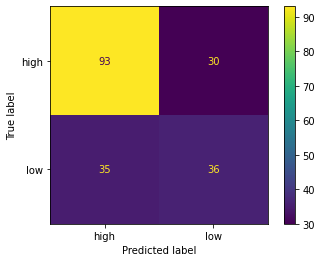

Naive Bayes score @ 6% test split:  0.6907216494845361
Naive Bayes score @ 94% train split:  0.6847736625514403


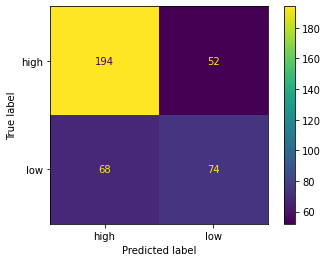

Naive Bayes score @ 10% test split:  0.7078825347758887
Naive Bayes score @ 90% train split:  0.6825997248968363


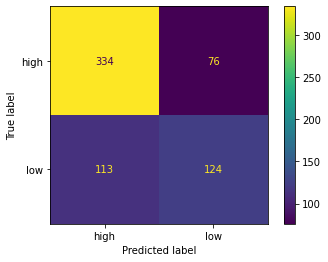

Naive Bayes score @ 20% test split:  0.6852281515854601
Naive Bayes score @ 80% train split:  0.6851063829787234


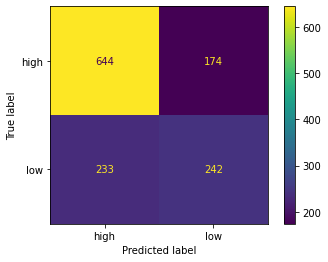

Naive Bayes score @ 30% test split:  0.6807632800412584
Naive Bayes score @ 70% train split:  0.6870026525198939


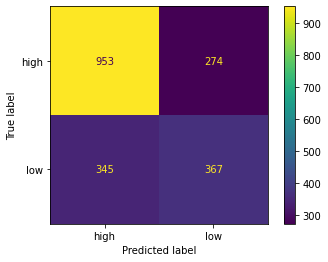

Naive Bayes score @ 40% test split:  0.6786542923433875
Naive Bayes score @ 60% train split:  0.6894506061387671


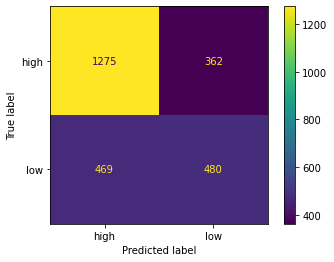

In [33]:
'''
GNB with the StandardScaler
'''

sx03_train, sx03_test, y03_train, y03_test = train_test_split(xs, y, test_size= 0.03, random_state=0,stratify=y)
sx06_train, sx06_test, y06_train, y06_test = train_test_split(xs,  y, test_size= 0.06, random_state=0,stratify=y)
sx1_train, sx1_test, y1_train, y1_test = train_test_split(xs, y, test_size= 0.1, random_state=0,stratify=y)
sx2_train, sx2_test, y2_train, y2_test = train_test_split(xs, y, test_size= 0.2, random_state=0,stratify=y)
sx3_train, sx3_test, y3_train, y3_test = train_test_split(xs,  y, test_size= 0.3, random_state=0,stratify=y)
sx4_train, sx4_test, y4_train, y4_test = train_test_split(xs, y, test_size= 0.4, random_state=0,stratify=y)

sgnb=GaussianNB()

sgnb.fit(sx03_train, y03_train)
sgnb.fit(sx06_train, y06_train)
sgnb.fit(sx1_train, y1_train)
sgnb.fit(sx2_train, y2_train)
sgnb.fit(sx3_train, y3_train)
sgnb.fit(sx4_train, y4_train)

print ('GNB with StandardScaler')

print("Naive Bayes score @ 3% test split: ",sgnb.score(sx03_test, y03_test))
print("Naive Bayes score @ 97% train split: ",sgnb.score(sx03_train, y03_train))
predictions = sgnb.predict(sx03_test)
cm = confusion_matrix(y03_test, predictions, labels=sgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 6% test split: ",sgnb.score(sx06_test, y06_test))
print("Naive Bayes score @ 94% train split: ",sgnb.score(sx06_train, y06_train))
predictions = sgnb.predict(sx06_test)
cm = confusion_matrix(y06_test, predictions, labels=sgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 10% test split: ",sgnb.score(sx1_test, y1_test))
print("Naive Bayes score @ 90% train split: ",sgnb.score(sx1_train, y1_train))
predictions = sgnb.predict(sx1_test)
cm = confusion_matrix(y1_test, predictions, labels=sgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 20% test split: ",sgnb.score(sx2_test, y2_test))
print("Naive Bayes score @ 80% train split: ",sgnb.score(sx2_train, y2_train))
predictions = sgnb.predict(sx2_test)
cm = confusion_matrix(y2_test, predictions, labels=sgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 30% test split: ",sgnb.score(sx3_test, y3_test))
print("Naive Bayes score @ 70% train split: ",sgnb.score(sx3_train, y3_train))
predictions = sgnb.predict(sx3_test)
cm = confusion_matrix(y3_test, predictions, labels=sgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 40% test split: ",sgnb.score(sx4_test, y4_test))
print("Naive Bayes score @ 60% train split: ",sgnb.score(sx4_train, y4_train))
predictions = sgnb.predict(sx4_test)
cm = confusion_matrix(y4_test, predictions, labels=sgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgnb.classes_)
disp.plot()
plt.show()

# (Scikit-learn developers 2022)

GNB with Normalizer
Naive Bayes score @ 3% test split:  0.6185567010309279
Naive Bayes score @ 97% train split:  0.6404530228106556


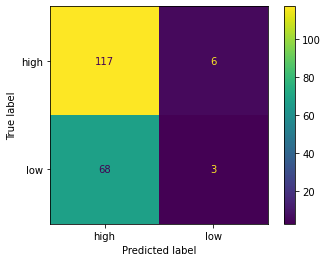

Naive Bayes score @ 6% test split:  0.6417525773195877
Naive Bayes score @ 94% train split:  0.6396707818930041


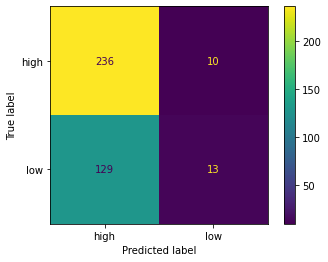

Naive Bayes score @ 10% test split:  0.6491499227202473
Naive Bayes score @ 90% train split:  0.6387551581843192


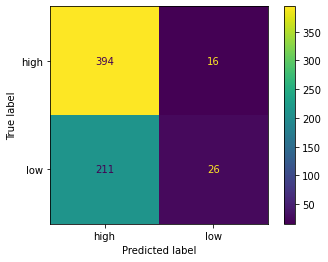

Naive Bayes score @ 20% test split:  0.645784996133024
Naive Bayes score @ 80% train split:  0.6382978723404256


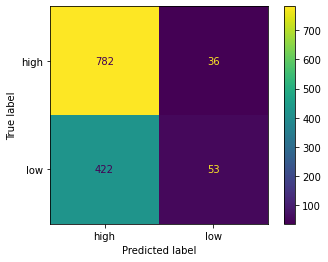

Naive Bayes score @ 30% test split:  0.6441464672511604
Naive Bayes score @ 70% train split:  0.6379310344827587


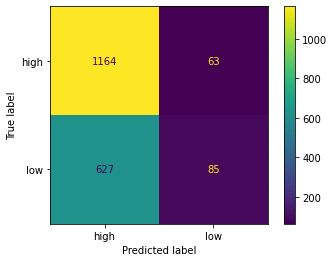

Naive Bayes score @ 40% test split:  0.6430781129156999
Naive Bayes score @ 60% train split:  0.6376063966984782


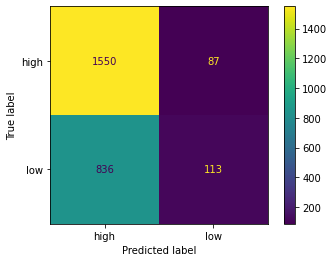

In [34]:
'''
GNB with the Normalizer
'''

nx03_train, nx03_test, y03_train, y03_test = train_test_split(xn, y, test_size= 0.03, random_state=0,stratify=y)
nx06_train, nx06_test, y06_train, y06_test = train_test_split(xn,  y, test_size= 0.06, random_state=0,stratify=y)
nx1_train, nx1_test, y1_train, y1_test = train_test_split(xn, y, test_size= 0.1, random_state=0,stratify=y)
nx2_train, nx2_test, y2_train, y2_test = train_test_split(xn, y, test_size= 0.2, random_state=0,stratify=y)
nx3_train, nx3_test, y3_train, y3_test = train_test_split(xn,  y, test_size= 0.3, random_state=0,stratify=y)
nx4_train, nx4_test, y4_train, y4_test = train_test_split(xn, y, test_size= 0.4, random_state=0,stratify=y)

ngnb=GaussianNB()

ngnb.fit(nx03_train, y03_train)
ngnb.fit(nx06_train, y06_train)
ngnb.fit(nx1_train, y1_train)
ngnb.fit(nx2_train, y2_train)
ngnb.fit(nx3_train, y3_train)
ngnb.fit(nx4_train, y4_train)

print ('GNB with Normalizer')

print("Naive Bayes score @ 3% test split: ",ngnb.score(nx03_test, y03_test))
print("Naive Bayes score @ 97% train split: ",ngnb.score(nx03_train, y03_train))
predictions = ngnb.predict(nx03_test)
cm = confusion_matrix(y03_test, predictions, labels=ngnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ngnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 6% test split: ",ngnb.score(nx06_test, y06_test))
print("Naive Bayes score @ 94% train split: ",ngnb.score(nx06_train, y06_train))
predictions = ngnb.predict(nx06_test)
cm = confusion_matrix(y06_test, predictions, labels=ngnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ngnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 10% test split: ",ngnb.score(nx1_test, y1_test))
print("Naive Bayes score @ 90% train split: ",ngnb.score(nx1_train, y1_train))
predictions = ngnb.predict(nx1_test)
cm = confusion_matrix(y1_test, predictions, labels=ngnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ngnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 20% test split: ",ngnb.score(nx2_test, y2_test))
print("Naive Bayes score @ 80% train split: ",ngnb.score(nx2_train, y2_train))
predictions = ngnb.predict(nx2_test)
cm = confusion_matrix(y2_test, predictions, labels=ngnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ngnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 30% test split: ",ngnb.score(nx3_test, y3_test))
print("Naive Bayes score @ 70% train split: ",ngnb.score(nx3_train, y3_train))
predictions = ngnb.predict(nx3_test)
cm = confusion_matrix(y3_test, predictions, labels=ngnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ngnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 40% test split: ",ngnb.score(nx4_test, y4_test))
print("Naive Bayes score @ 60% train split: ",ngnb.score(nx4_train, y4_train))
predictions = ngnb.predict(nx4_test)
cm = confusion_matrix(y4_test, predictions, labels=ngnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ngnb.classes_)
disp.plot()
plt.show()

# (Scikit-learn developers 2022)

GNB with MinMaxScaler
Naive Bayes score @ 3% test split:  0.6649484536082474
Naive Bayes score @ 97% train split:  0.6857553038762163


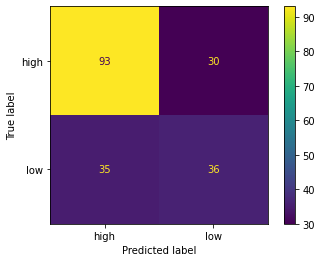

Naive Bayes score @ 6% test split:  0.6907216494845361
Naive Bayes score @ 94% train split:  0.6847736625514403


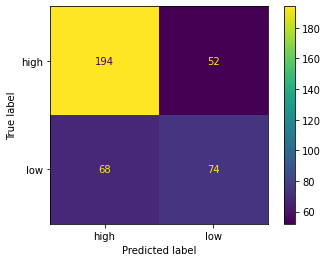

Naive Bayes score @ 10% test split:  0.7078825347758887
Naive Bayes score @ 90% train split:  0.6825997248968363


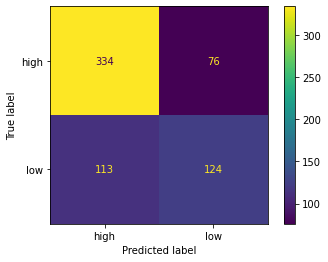

Naive Bayes score @ 20% test split:  0.6852281515854601
Naive Bayes score @ 80% train split:  0.6851063829787234


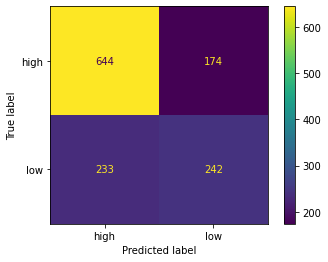

Naive Bayes score @ 30% test split:  0.6807632800412584
Naive Bayes score @ 70% train split:  0.6870026525198939


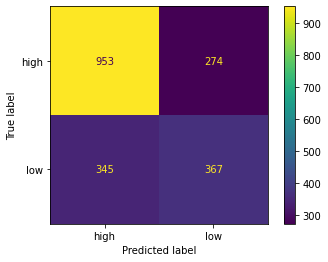

Naive Bayes score @ 40% test split:  0.6786542923433875
Naive Bayes score @ 60% train split:  0.6894506061387671


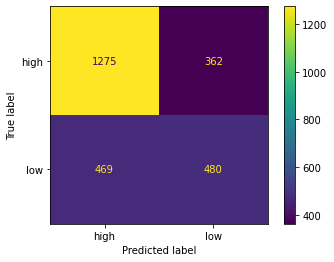

In [35]:
'''
GNB with the MinMaxScale
'''

mx03_train, mx03_test, y03_train, y03_test = train_test_split(xm, y, test_size= 0.03, random_state=0,stratify=y)
mx06_train, mx06_test, y06_train, y06_test = train_test_split(xm,  y, test_size= 0.06, random_state=0,stratify=y)
mx1_train, mx1_test, y1_train, y1_test = train_test_split(xm, y, test_size= 0.1, random_state=0,stratify=y)
mx2_train, mx2_test, y2_train, y2_test = train_test_split(xm, y, test_size= 0.2, random_state=0,stratify=y)
mx3_train, mx3_test, y3_train, y3_test = train_test_split(xm,  y, test_size= 0.3, random_state=0,stratify=y)
mx4_train, mx4_test, y4_train, y4_test = train_test_split(xm, y, test_size= 0.4, random_state=0,stratify=y)

mgnb=GaussianNB()

mgnb.fit(mx03_train, y03_train)
mgnb.fit(mx06_train, y06_train)
mgnb.fit(mx1_train, y1_train)
mgnb.fit(mx2_train, y2_train)
mgnb.fit(mx3_train, y3_train)
mgnb.fit(mx4_train, y4_train)

print ('GNB with MinMaxScaler')

print("Naive Bayes score @ 3% test split: ",mgnb.score(mx03_test, y03_test))
print("Naive Bayes score @ 97% train split: ",mgnb.score(mx03_train, y03_train))
predictions = mgnb.predict(mx03_test)
cm = confusion_matrix(y03_test, predictions, labels=mgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 6% test split: ",mgnb.score(mx06_test, y06_test))
print("Naive Bayes score @ 94% train split: ",mgnb.score(mx06_train, y06_train))
predictions = mgnb.predict(mx06_test)
cm = confusion_matrix(y06_test, predictions, labels=mgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 10% test split: ",mgnb.score(mx1_test, y1_test))
print("Naive Bayes score @ 90% train split: ",mgnb.score(mx1_train, y1_train))
predictions = mgnb.predict(mx1_test)
cm = confusion_matrix(y1_test, predictions, labels=mgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 20% test split: ",mgnb.score(mx2_test, y2_test))
print("Naive Bayes score @ 80% train split: ",mgnb.score(mx2_train, y2_train))
predictions = mgnb.predict(mx2_test)
cm = confusion_matrix(y2_test, predictions, labels=mgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 30% test split: ",mgnb.score(mx3_test, y3_test))
print("Naive Bayes score @ 70% train split: ",mgnb.score(mx3_train, y3_train))
predictions = mgnb.predict(mx3_test)
cm = confusion_matrix(y3_test, predictions, labels=mgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mgnb.classes_)
disp.plot()
plt.show()

print("Naive Bayes score @ 40% test split: ",mgnb.score(mx4_test, y4_test))
print("Naive Bayes score @ 60% train split: ",mgnb.score(mx4_train, y4_train))
predictions = mgnb.predict(mx4_test)
cm = confusion_matrix(y4_test, predictions, labels=mgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mgnb.classes_)
disp.plot()
plt.show()

In [36]:
'''
After testing the GNB model with the three different type of scalers I can see the the scores do not imporve 
past 70.78% for the test and 68.25% for the training.

I was concerned with the fact that the Standardscaler and MinMaxscaler had the same scores so below this cell I check that the x variables had been scaled 
but entering the following two lines of code in two separate cells

xs.describe().apply(lambda s: s.apply('{0:.4f}'.format))
and
xm.describe().apply(lambda s: s.apply('{0:.4f}'.format))

Based on the summary of data showing different figures in results I am confident that these two scalers were implemented correctly and that they
make no significant difference in improving the train and test set scores

'''
print('GNB without Scaler')
print("Naive Bayes score @ 10% test split: ",gnb.score(x1_test, y1_test))
print("Naive Bayes score @ 90% train split: ",gnb.score(x1_train, y1_train))
print('GNB with StandardScaler')
print("StandardScaler Naive Bayes score @ 10% test split: ",sgnb.score(sx1_test, y1_test))
print("StandardScaler Naive Bayes score @ 90% train split: ",sgnb.score(sx1_train, y1_train))
print('GNB with Normalizer')
print("Normalizer Naive Bayes score @ 10% test split: ",ngnb.score(nx1_test, y1_test))
print("Normalizer Naive Bayes score @ 90% train split: ",ngnb.score(nx1_train, y1_train))
print('GNB without MinMaxScaler')
print("MinMaxScaler Naive Bayes score @ 10% test split: ",mgnb.score(mx1_test, y1_test))
print("MinMaxScaler Naive Bayes score @ 90% train split: ",mgnb.score(mx1_train, y1_train))

GNB without Scaler
Naive Bayes score @ 10% test split:  0.7078825347758887
Naive Bayes score @ 90% train split:  0.6860385144429161
GNB with StandardScaler
StandardScaler Naive Bayes score @ 10% test split:  0.7078825347758887
StandardScaler Naive Bayes score @ 90% train split:  0.6825997248968363
GNB with Normalizer
Normalizer Naive Bayes score @ 10% test split:  0.6491499227202473
Normalizer Naive Bayes score @ 90% train split:  0.6387551581843192
GNB without MinMaxScaler
MinMaxScaler Naive Bayes score @ 10% test split:  0.7078825347758887
MinMaxScaler Naive Bayes score @ 90% train split:  0.6825997248968363


In [37]:
'''
K-Folds is a process where the entire data set is split into K equal sizes, each of these folds have a turn to act as the testing set

Stratified K-Fold ensures that when the data is is imbalanced each fold has an equal weighting of High and Low quailty observations

Therefore I will use Stratified K-Fold and due to the 10% split working the best I will spilt the K-Folds into 10 folds

As one can see from the results this does not improve the socres
'''

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=10)

scorecross=cross_val_score(gnb,x,y,cv=stratifiedkf)
scorecross_s=cross_val_score(sgnb,xs,y,cv=stratifiedkf)
scorecross_n=cross_val_score(ngnb,xn,y,cv=stratifiedkf)
scorecross_m=cross_val_score(mgnb,xm,y,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(scorecross))
print("Average Cross Validation score :{}".format(scorecross.mean()))
print()
print("StandardScaler Cross Validation Scores are {}".format(scorecross_s))
print("Average Cross Validation score :{}".format(scorecross_s.mean()))
print()
print("Normalizer Cross Validation Scores are {}".format(scorecross_n))
print("Average Cross Validation score :{}".format(scorecross_n.mean()))
print()
print("MinMaxScaler Cross Validation Scores are {}".format(scorecross_m))
print("Average Cross Validation score :{}".format(scorecross_m.mean()))

# (Hazra 2021)

Cross Validation Scores are [0.69706337 0.64914992 0.64914992 0.64860681 0.68885449 0.66563467
 0.67337461 0.78637771 0.43962848 0.625387  ]
Average Cross Validation score :0.6523226991927495

StandardScaler Cross Validation Scores are [0.68469861 0.65378671 0.64451314 0.65944272 0.69195046 0.64705882
 0.67027864 0.78637771 0.43343653 0.62383901]
Average Cross Validation score :0.6495382355333736

Normalizer Cross Validation Scores are [0.63369397 0.63523957 0.63214838 0.63312693 0.62383901 0.6377709
 0.6501548  0.55572755 0.40402477 0.41795666]
Average Cross Validation score :0.5823682535732914

MinMaxScaler Cross Validation Scores are [0.68469861 0.65378671 0.64451314 0.65944272 0.69195046 0.64705882
 0.67027864 0.78637771 0.43343653 0.62383901]
Average Cross Validation score :0.6495382355333736


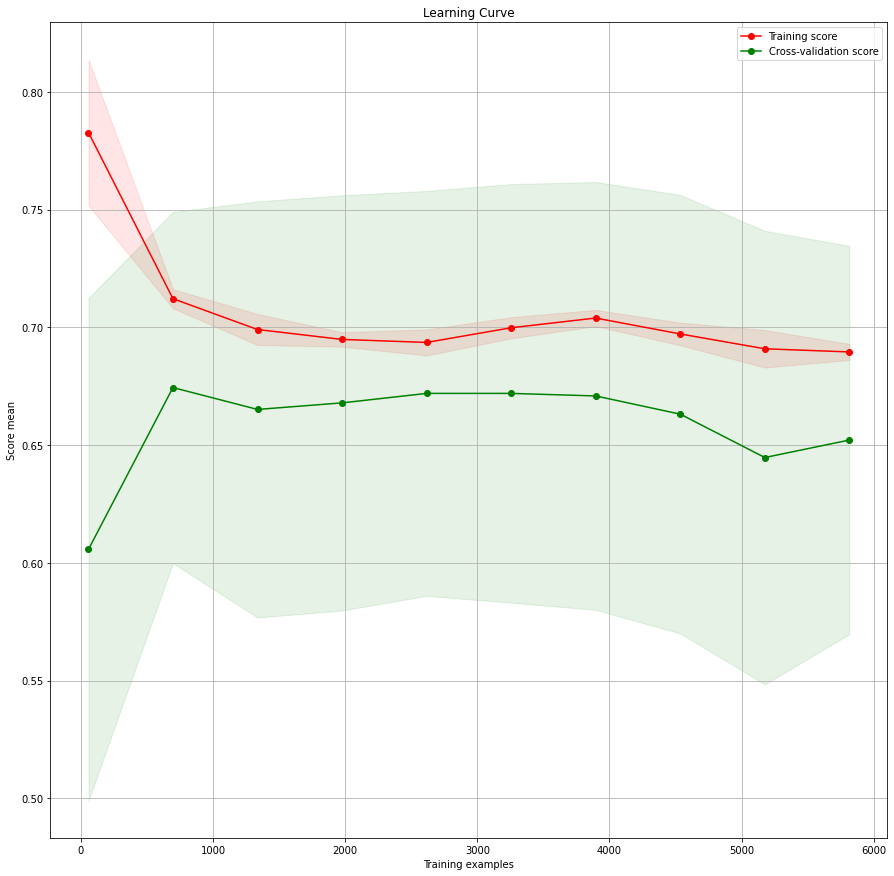

In [38]:
'''
Plotting the mean gnb without scalcer with 10 splits as this combination performed the best
'''

from sklearn.model_selection import learning_curve
from sklearn import model_selection

from sklearn_evaluation import plot

plt.figure(figsize=(15,15))
plt.yticks(np.arange(0, 1, step=0.05))

cv = model_selection.ShuffleSplit(df.shape[0], test_size=0.10, random_state=0)
cv = 10
estimator = GaussianNB()
train_sizes = np.linspace(.01, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=1, train_sizes=train_sizes)
plot.learning_curve(train_scores, test_scores, train_sizes)

plt.show()

# (Reyes 2016)

KNN score @ 3% test split:  0.7061855670103093
KNN score @ 97% train split:  0.9030148349018983


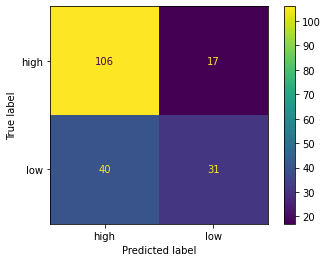

KNN score @ 6% test split:  0.729381443298969
KNN score @ 94% train split:  0.9078189300411522


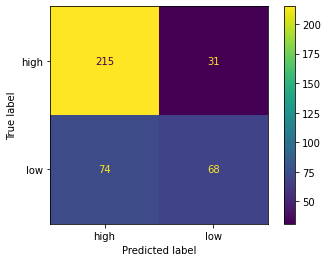

KNN score @ 10% test split:  0.7202472952086554
KNN score @ 90% train split:  0.9167812929848693


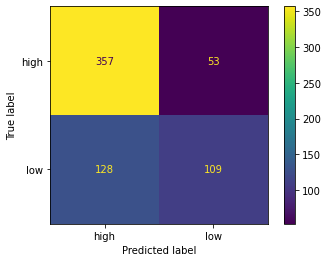

KNN score @ 20% test split:  0.7347254447022429
KNN score @ 80% train split:  0.9377176015473888


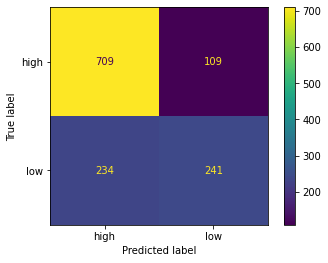

KNN score @ 30% test split:  0.7411036616812791
KNN score @ 70% train split:  0.9639699381078691


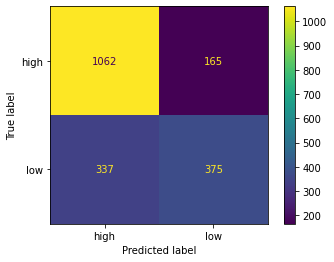

KNN score @ 40% test split:  0.742846094354215
KNN score @ 60% train split:  1.0


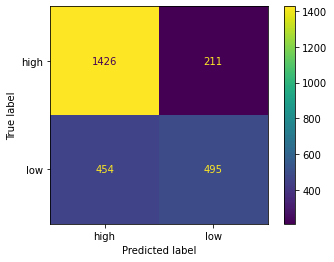

In [39]:
'''
I will now compare how well the model works with KNN 

KNN classifies each observation based on how close it is to the negiboring observations, the classification with the most number of observations around
the measured values is the predicted class 

All test/train splits were tested with n_neighbors starting at 1 and increasing by the next odd number, after n increased past 17 the scores did not
improve hence I will use n_neighbors=17. While the different scalers may perform differently depending on the number of neighbors selected the improvement
would only be marginal (this was verified for each scaler models results are all 6 splits, the model was very little model improvment).
'''

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17, weights='distance')


knn.fit(x03_train, y03_train)
knn.fit(x06_train, y06_train)
knn.fit(x1_train, y1_train)
knn.fit(x2_train, y2_train)
knn.fit(x3_train, y3_train)
knn.fit(x4_train, y4_train)

print("KNN score @ 3% test split: ",knn.score(x03_test, y03_test))
print("KNN score @ 97% train split: ",knn.score(x03_train, y03_train))
predictions = knn.predict(x03_test)
cm = confusion_matrix(y03_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print("KNN score @ 6% test split: ",knn.score(x06_test, y06_test))
print("KNN score @ 94% train split: ",knn.score(x06_train, y06_train))
predictions = knn.predict(x06_test)
cm = confusion_matrix(y06_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print("KNN score @ 10% test split: ",knn.score(x1_test, y1_test))
print("KNN score @ 90% train split: ",knn.score(x1_train, y1_train))
predictions = knn.predict(x1_test)
cm = confusion_matrix(y1_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print("KNN score @ 20% test split: ",knn.score(x2_test, y2_test))
print("KNN score @ 80% train split: ",knn.score(x2_train, y2_train))
predictions = knn.predict(x2_test)
cm = confusion_matrix(y2_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print("KNN score @ 30% test split: ",knn.score(x3_test, y3_test))
print("KNN score @ 70% train split: ",knn.score(x3_train, y3_train))
predictions = knn.predict(x3_test)
cm = confusion_matrix(y3_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print("KNN score @ 40% test split: ",knn.score(x4_test, y4_test))
print("KNN score @ 60% train split: ",knn.score(x4_train, y4_train))
predictions = knn.predict(x4_test)
cm = confusion_matrix(y4_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

# (Scikit-learn developers 2022)

In [52]:
'''
I will now compare the KNN results above after the different scalers are applied
'''
print()

KNN with StandardScaler
sknn score @ 3% test split:  0.7783505154639175
sknn score @ 97% train split:  0.9211995533577924


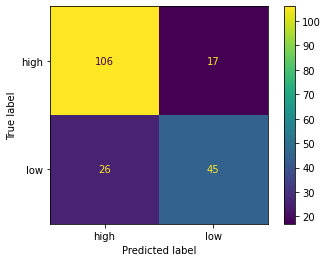

sknn score @ 6% test split:  0.8015463917525774
sknn score @ 94% train split:  0.9242798353909465


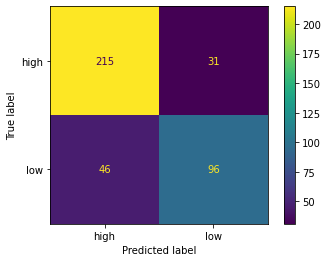

sknn score @ 10% test split:  0.8021638330757341
sknn score @ 90% train split:  0.9296767537826685


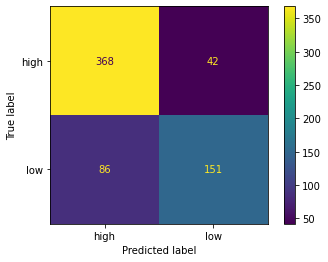

sknn score @ 20% test split:  0.7958236658932715
sknn score @ 80% train split:  0.9471953578336557


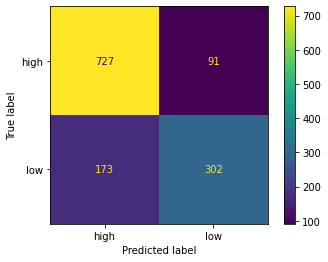

sknn score @ 30% test split:  0.7978339350180506
sknn score @ 70% train split:  0.967948717948718


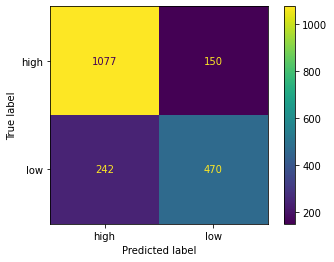

sknn score @ 40% test split:  0.7923433874709976
sknn score @ 60% train split:  1.0


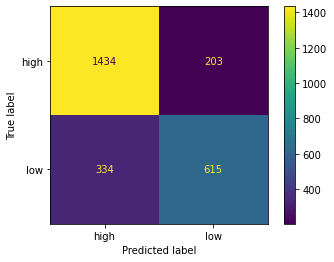

In [41]:
'''
KNN with the StandardScaler
'''
sknn = KNeighborsClassifier(n_neighbors=17, weights='distance')


sknn.fit(sx03_train, y03_train)
sknn.fit(sx06_train, y06_train)
sknn.fit(sx1_train, y1_train)
sknn.fit(sx2_train, y2_train)
sknn.fit(sx3_train, y3_train)
sknn.fit(sx4_train, y4_train)

print ('KNN with StandardScaler')

print("sknn score @ 3% test split: ",sknn.score(sx03_test, y03_test))
print("sknn score @ 97% train split: ",sknn.score(sx03_train, y03_train))
predictions = sknn.predict(sx03_test)
cm = confusion_matrix(y03_test, predictions, labels=sknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sknn.classes_)
disp.plot()
plt.show()

print("sknn score @ 6% test split: ",sknn.score(sx06_test, y06_test))
print("sknn score @ 94% train split: ",sknn.score(sx06_train, y06_train))
predictions = sknn.predict(sx06_test)
cm = confusion_matrix(y06_test, predictions, labels=sknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sknn.classes_)
disp.plot()
plt.show()

print("sknn score @ 10% test split: ",sknn.score(sx1_test, y1_test))
print("sknn score @ 90% train split: ",sknn.score(sx1_train, y1_train))
predictions = sknn.predict(sx1_test)
cm = confusion_matrix(y1_test, predictions, labels=sknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sknn.classes_)
disp.plot()
plt.show()

print("sknn score @ 20% test split: ",sknn.score(sx2_test, y2_test))
print("sknn score @ 80% train split: ",sknn.score(sx2_train, y2_train))
predictions = sknn.predict(sx2_test)
cm = confusion_matrix(y2_test, predictions, labels=sknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sknn.classes_)
disp.plot()
plt.show()

print("sknn score @ 30% test split: ",sknn.score(sx3_test, y3_test))
print("sknn score @ 70% train split: ",sknn.score(sx3_train, y3_train))
predictions = sknn.predict(sx3_test)
cm = confusion_matrix(y3_test, predictions, labels=sknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sknn.classes_)
disp.plot()
plt.show()

print("sknn score @ 40% test split: ",sknn.score(sx4_test, y4_test))
print("sknn score @ 60% train split: ",sknn.score(sx4_train, y4_train))
predictions = sknn.predict(sx4_test)
cm = confusion_matrix(y4_test, predictions, labels=sknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sknn.classes_)
disp.plot()
plt.show()

# (Scikit-learn developers 2022)

KNN with Normalizer
nknn score @ 3% test split:  0.7164948453608248
nknn score @ 97% train split:  0.9025362896793747


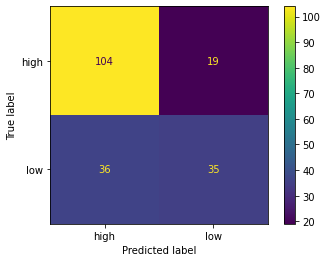

nknn score @ 6% test split:  0.7268041237113402
nknn score @ 94% train split:  0.9078189300411522


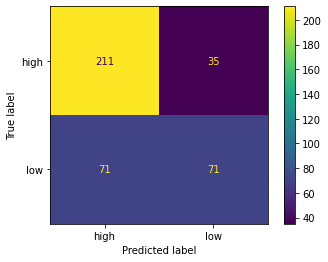

nknn score @ 10% test split:  0.723338485316847
nknn score @ 90% train split:  0.9162654745529574


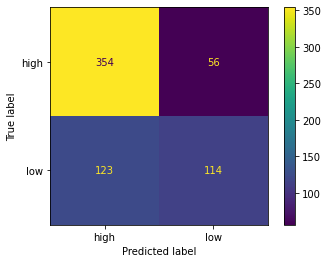

nknn score @ 20% test split:  0.7440061871616396
nknn score @ 80% train split:  0.9352030947775629


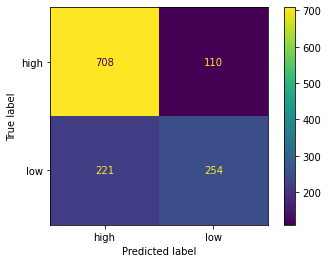

nknn score @ 30% test split:  0.7457452294997421
nknn score @ 70% train split:  0.9617595048629531


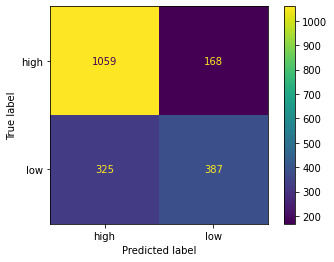

nknn score @ 40% test split:  0.7424593967517401
nknn score @ 60% train split:  1.0


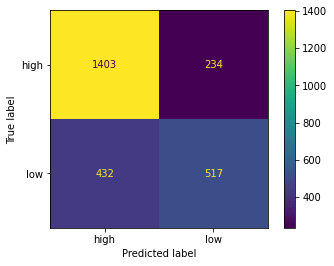

In [42]:
'''
KNN with the Normalizer
'''
nknn = KNeighborsClassifier(n_neighbors=17, weights='distance')


nknn.fit(nx03_train, y03_train)
nknn.fit(nx06_train, y06_train)
nknn.fit(nx1_train, y1_train)
nknn.fit(nx2_train, y2_train)
nknn.fit(nx3_train, y3_train)
nknn.fit(nx4_train, y4_train)

print ('KNN with Normalizer')


print("nknn score @ 3% test split: ",nknn.score(nx03_test, y03_test))
print("nknn score @ 97% train split: ",nknn.score(nx03_train, y03_train))
predictions = nknn.predict(nx03_test)
cm = confusion_matrix(y03_test, predictions, labels=nknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nknn.classes_)
disp.plot()
plt.show()

print("nknn score @ 6% test split: ",nknn.score(nx06_test, y06_test))
print("nknn score @ 94% train split: ",nknn.score(nx06_train, y06_train))
predictions = nknn.predict(nx06_test)
cm = confusion_matrix(y06_test, predictions, labels=nknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nknn.classes_)
disp.plot()
plt.show()

print("nknn score @ 10% test split: ",nknn.score(nx1_test, y1_test))
print("nknn score @ 90% train split: ",nknn.score(nx1_train, y1_train))
predictions = nknn.predict(nx1_test)
cm = confusion_matrix(y1_test, predictions, labels=nknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nknn.classes_)
disp.plot()
plt.show()

print("nknn score @ 20% test split: ",nknn.score(nx2_test, y2_test))
print("nknn score @ 80% train split: ",nknn.score(nx2_train, y2_train))
predictions = nknn.predict(nx2_test)
cm = confusion_matrix(y2_test, predictions, labels=nknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nknn.classes_)
disp.plot()
plt.show()

print("nknn score @ 30% test split: ",nknn.score(nx3_test, y3_test))
print("nknn score @ 70% train split: ",nknn.score(nx3_train, y3_train))
predictions = nknn.predict(nx3_test)
cm = confusion_matrix(y3_test, predictions, labels=nknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nknn.classes_)
disp.plot()
plt.show()

print("nknn score @ 40% test split: ",nknn.score(nx4_test, y4_test))
print("nknn score @ 60% train split: ",nknn.score(nx4_train, y4_train))
predictions = nknn.predict(nx4_test)
cm = confusion_matrix(y4_test, predictions, labels=nknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nknn.classes_)
disp.plot()
plt.show()

# (Scikit-learn developers 2022)

KNN with MinMaxScaler
mknn score @ 3% test split:  0.7989690721649485
mknn score @ 97% train split:  0.9243898548412826


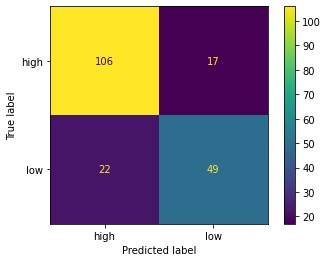

mknn score @ 6% test split:  0.8221649484536082
mknn score @ 94% train split:  0.9269135802469136


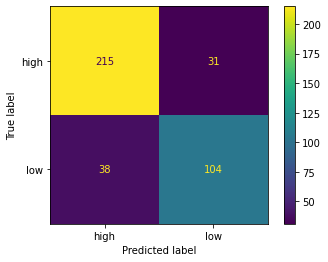

mknn score @ 10% test split:  0.8114374034003091
mknn score @ 90% train split:  0.9327716643741403


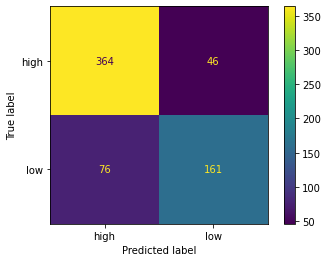

mknn score @ 20% test split:  0.8043310131477185
mknn score @ 80% train split:  0.9497098646034816


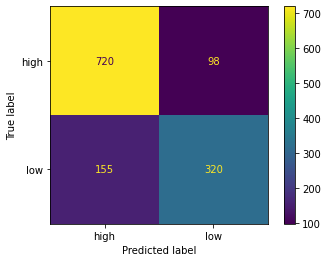

mknn score @ 30% test split:  0.8076328004125838
mknn score @ 70% train split:  0.969053934571176


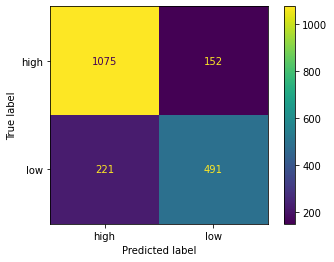

mknn score @ 40% test split:  0.8016241299303944
mknn score @ 60% train split:  1.0


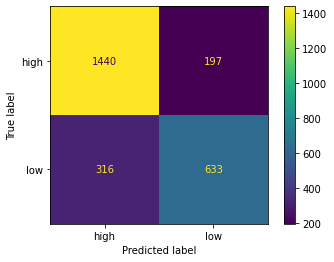

In [43]:
'''
KNN with the MinMaxScale
'''
mknn = KNeighborsClassifier(n_neighbors=17, weights='distance')


mknn.fit(mx03_train, y03_train)
mknn.fit(mx06_train, y06_train)
mknn.fit(mx1_train, y1_train)
mknn.fit(mx2_train, y2_train)
mknn.fit(mx3_train, y3_train)
mknn.fit(mx4_train, y4_train)

print ('KNN with MinMaxScaler')


print("mknn score @ 3% test split: ",mknn.score(mx03_test, y03_test))
print("mknn score @ 97% train split: ",mknn.score(mx03_train, y03_train))
predictions = mknn.predict(mx03_test)
cm = confusion_matrix(y03_test, predictions, labels=mknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mknn.classes_)
disp.plot()
plt.show()

print("mknn score @ 6% test split: ",mknn.score(mx06_test, y06_test))
print("mknn score @ 94% train split: ",mknn.score(mx06_train, y06_train))
predictions = mknn.predict(mx06_test)
cm = confusion_matrix(y06_test, predictions, labels=mknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mknn.classes_)
disp.plot()
plt.show()

print("mknn score @ 10% test split: ",mknn.score(mx1_test, y1_test))
print("mknn score @ 90% train split: ",mknn.score(mx1_train, y1_train))
predictions = mknn.predict(mx1_test)
cm = confusion_matrix(y1_test, predictions, labels=mknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mknn.classes_)
disp.plot()
plt.show()

print("mknn score @ 20% test split: ",mknn.score(mx2_test, y2_test))
print("mknn score @ 80% train split: ",mknn.score(mx2_train, y2_train))
predictions = mknn.predict(mx2_test)
cm = confusion_matrix(y2_test, predictions, labels=mknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mknn.classes_)
disp.plot()
plt.show()

print("mknn score @ 30% test split: ",mknn.score(mx3_test, y3_test))
print("mknn score @ 70% train split: ",mknn.score(mx3_train, y3_train))
predictions = mknn.predict(mx3_test)
cm = confusion_matrix(y3_test, predictions, labels=mknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mknn.classes_)
disp.plot()
plt.show()

print("mknn score @ 40% test split: ",mknn.score(mx4_test, y4_test))
print("mknn score @ 60% train split: ",mknn.score(mx4_train, y4_train))
predictions = mknn.predict(mx4_test)
cm = confusion_matrix(y4_test, predictions, labels=mknn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mknn.classes_)
disp.plot()
plt.show()

# (Scikit-learn developers 2022)

In [44]:
'''
After testing the KNN model there was improvement compared to the GNB model. Additionally, the three different type of scalers showed improvement 
at different splits, the results with the best split are printed below, the MinMaxScaler works best with KNN at a 6/94 split of data

'''
print('KNN without Scaler')
print("KNN score @ 40% test split: ",knn.score(x4_test, y4_test))
print("KNN score @ 60% train split: ",knn.score(x4_train, y4_train))
print('KNN with StandardScaler')
print("StandardScaler KNN score @ 10% test split: ",sknn.score(sx1_test, y1_test))
print("StandardScaler KNN score @ 90% train split: ",sknn.score(sx1_train, y1_train))
print('KNN with Normalizer')
print("Normalizer KNN score @ 30% test split: ",nknn.score(nx3_test, y3_test))
print("Normalizer KNN score @ 70% train split: ",nknn.score(nx3_train, y3_train))
print('KNN without MinMaxScaler')
print("MinMaxScaler KNN score @ 6% test split: ",mknn.score(mx06_test, y06_test))
print("MinMaxScaler KNN score @ 94% train split: ",mknn.score(mx06_train, y06_train))

KNN without Scaler
KNN score @ 40% test split:  0.742846094354215
KNN score @ 60% train split:  1.0
KNN with StandardScaler
StandardScaler KNN score @ 10% test split:  0.8021638330757341
StandardScaler KNN score @ 90% train split:  0.9296767537826685
KNN with Normalizer
Normalizer KNN score @ 30% test split:  0.7457452294997421
Normalizer KNN score @ 70% train split:  0.9617595048629531
KNN without MinMaxScaler
MinMaxScaler KNN score @ 6% test split:  0.8221649484536082
MinMaxScaler KNN score @ 94% train split:  0.9269135802469136


In [45]:
'''
Stratified Cross validation was then split according to the best weightings in each class rounded up to the larger whole number

For example the MinMaxscaler scores performed best at a 6/94 split, therefore I said 100/6 which equals to 16.6666, hence n_splits was set at 17

From the example below we can see that the cross validation of data does not improve the scores, the scores are actually worse.
'''

stratifiedkf=StratifiedKFold(n_splits=3)

stratifiedkfs=StratifiedKFold(n_splits=10)

stratifiedkfn=StratifiedKFold(n_splits=4)

stratifiedkfm=StratifiedKFold(n_splits=17)

scorecross=cross_val_score(gnb,x,y,cv=stratifiedkf)
scorecross_s=cross_val_score(sgnb,xs,y,cv=stratifiedkfs)
scorecross_n=cross_val_score(ngnb,xn,y,cv=stratifiedkfn)
scorecross_m=cross_val_score(mgnb,xm,y,cv=stratifiedkfm)

print("Cross Validation Scores are {}".format(scorecross))
print("Average Cross Validation score :{}".format(scorecross.mean()))
print()
print("StandardScaler Cross Validation Scores are {}".format(scorecross_s))
print("Average Cross Validation score :{}".format(scorecross_s.mean()))
print()
print("Normalizer Cross Validation Scores are {}".format(scorecross_n))
print("Average Cross Validation score :{}".format(scorecross_n.mean()))
print()
print("MinMaxScaler Cross Validation Scores are {}".format(scorecross_m))
print("Average Cross Validation score :{}".format(scorecross_m.mean()))

Cross Validation Scores are [0.65290023 0.67363045 0.6448468 ]
Average Cross Validation score :0.6571258278811485

StandardScaler Cross Validation Scores are [0.68469861 0.65378671 0.64451314 0.65944272 0.69195046 0.64705882
 0.67027864 0.78637771 0.43343653 0.62383901]
Average Cross Validation score :0.6495382355333736

Normalizer Cross Validation Scores are [0.63366337 0.63118812 0.66769802 0.44582043]
Average Cross Validation score :0.5945924845967568

MinMaxScaler Cross Validation Scores are [0.67979003 0.69553806 0.66141732 0.66578947 0.65263158 0.60789474
 0.7        0.71578947 0.66052632 0.66842105 0.64210526 0.66578947
 0.86842105 0.64473684 0.44473684 0.7        0.60263158]
Average Cross Validation score :0.6633070053549809


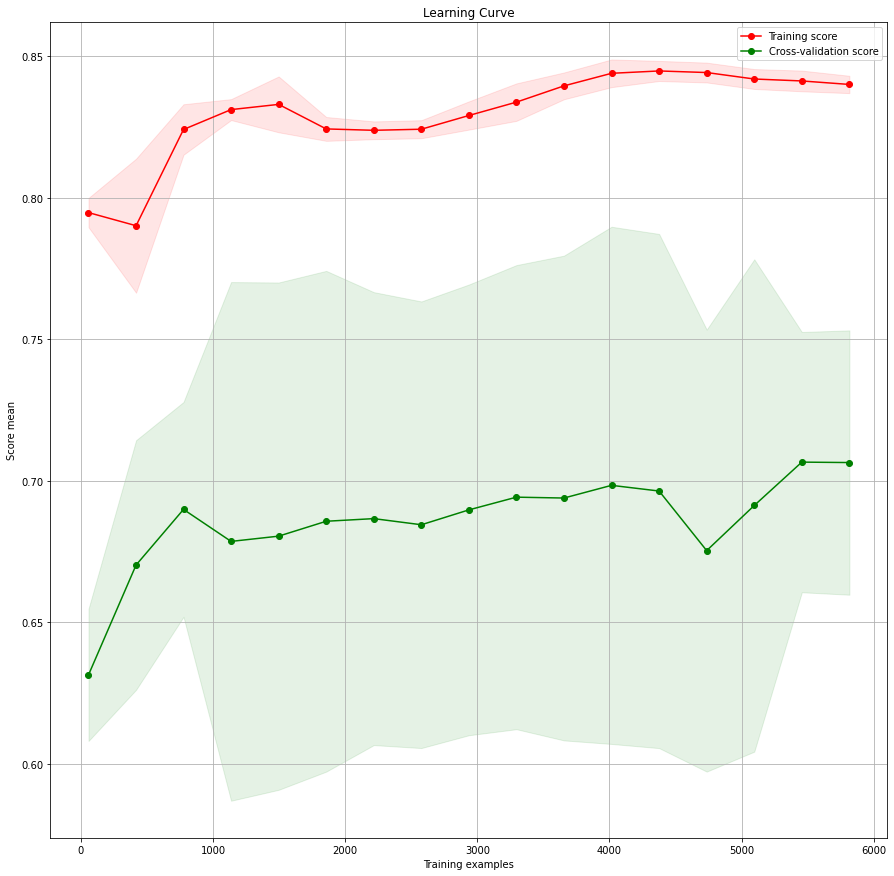

In [46]:
'''
plotting the KNN mean score with MinMaxScaler with 17 splits as this was the best model 
'''

plt.figure(figsize=(15,15))
plt.yticks(np.arange(0, 1, step=0.05))

cv = model_selection.ShuffleSplit(df.shape[0], test_size=0.06, random_state=0)
cv = 10
estimator = KNeighborsClassifier()
train_sizes = np.linspace(.01, 1.0, 17)
train_sizes, train_scores, test_scores = learning_curve(estimator, xm, y, cv=cv, n_jobs=1, train_sizes=train_sizes)
plot.learning_curve(train_scores, test_scores, train_sizes)

plt.show()

# (Reyes 2016)

In [53]:
'''
Based on the results above the KNN model out performs the Naïve Bayes Classifier when KNN is set to 17 n neighbours, the data is split with 6% of 
the data being used for testing and the MinMaxScaler is used on the x variables.

While the training score is around 10% higher than the testing score the best way to improve this model would be to find more wine observations with 
ratings on the exteme ends of the ratings. 
'''
print()

In [ ]:
'''
Reference list 

Boar, B. (2020) stop printing warnings python Code Example. [Online]. 23 February 2020. www.codegrepper.com. Available at: https://www.codegrepper.com/code-examples/python/stop+printing+warnings+python (Accessed: 24 May 2022).

Burgaud, A. (2022) How to Use Python Lambda Functions – Real Python. [Online]. 2022. realpython.com. Available at: https://realpython.com/python-lambda/ (Accessed: 28 May 2022).

Data To Fish (2020) How to Create a Correlation Matrix using Pandas - Data to Fish. [Online]. 27 March 2020. datatofish.com. Available at: https://datatofish.com/correlation-matrix-pandas/ (Accessed: 2 May 2022).

DataCamp Team (2020) Pandas Apply Tutorial for Python DataFrames. [Online]. 17 September 2020. www.datacamp.com. Available at: https://www.datacamp.com/tutorial/pandas-apply (Accessed: 28 May 2022).

Hale, J. (2019) Scale, Standardize, or Normalize with Scikit-Learn. [Online]. 4 March 2019. Medium. Available at: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 (Accessed: 4 June 2022).

Hazra, A. (2021) Top 7 cross validation techniques with Python Code. [Online]. 19 November 2021. Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/ (Accessed: 3 June 2022).

Marsja, E. (2020) Pandas Count Occurrences in Column - i.e. Unique Values. [Online]. 30 September 2020. Erik Marsja. Available at: https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/#:~:text=To%20count%20the%20number%20of%20occurrences%20in%20e.g.%20a%20column (Accessed: 18 May 2022).

Parmar, R. (2018) Wine Quality. [Online]. 2018. www.kaggle.com. Available at: https://www.kaggle.com/datasets/rajyellow46/wine-quality?datasetId=35901 (Accessed: 23 May 2022).

Refsnes Data (2022) Learn Python. [Online]. 2022. www.w3schools.com. Available at: https://www.w3schools.com/python/default.asp (Accessed: 2 May 2022).

Reyes, E.B. (2016) Plotting — sklearn-evaluation 0.5.8 documentation. [Online]. 2016. sklearn-evaluation.readthedocs.io. Available at: https://sklearn-evaluation.readthedocs.io/en/stable/api/plot.html (Accessed: 3 June 2022).

Scikit-learn developers (2022) scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [Online]. 2022. Scikit-learn.org. Available at: https://scikit-learn.org/stable/index.html (Accessed: 21 May 2022).

Shin, T. (2020) Predicting Wine Quality with Several Classification Techniques. [Online]. 8 May 2020. Medium. Available at: https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434 (Accessed: 2 May 2022).

Simplilearn (2022) Classification in Machine Learning | The Best Classification Models. [Online]. 3 June 2022. Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning (Accessed: 5 June 2022).

The Pandas Development Team (2022) Pandas Documentation. [Online]. 6 April 2022. pandas.pydata.org. Available at: https://pandas.pydata.org/docs/index.html (Accessed: 2 May 2022).
'''